In [1]:
!pip install tensorflow opencv-python matplotlib

  Using cached tensorflow-2.17.0-cp310-cp310-win_amd64.whl (2.0 kB)
  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
  Using cached matplotlib-3.9.1-cp310-cp310-win_amd64.whl (8.0 MB)


You should consider upgrading via the 'C:\Users\pavit\Desktop\Deep Learning\ImageClassificationApplication\imgclssenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
certifi                      2024.7.4
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.8.2
decorator                    5.1.1
exceptiongroup               1.2.1
executing                    2.0.1
flatbuffers                  24.3.25
fonttools                    4.53.1
gast                         0.6.0
google-pasta                 0.2.0
grpcio                       1.65.0
h5py                         3.11.0
idna                         3.7
ipykernel                    6.29.5
ipython                      8.26.0
jedi                         0.19.1
jupyter_client               8.6.2
jupyter_core                 5.7.2
keras                        3.4.1
ki

You should consider upgrading via the 'C:\Users\pavit\Desktop\Deep Learning\ImageClassificationApplication\imgclssenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
import tensorflow as tf
import os

In [5]:
import cv2
import imghdr

In [6]:
data_dir = 'data'

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\cats\1200px-Cat_November_2010-1a.jpg
Image not in ext list data\cats\1200px-Kitten_playing_with_a_ball_283005265384629.jpg
Image not in ext list data\cats\800px-Juvenile_Ragdoll.jpg
Image not in ext list data\cats\bengal-cat-plays-ball-on-600nw-2196663817.jpg
Image not in ext list data\cats\black-cat-back.jpg
Image not in ext list data\cats\BX146296_237A1405.JPG.webp
Image not in ext list data\cats\cat-home-441939.jpg
Image not in ext list data\cats\Cat20being20cuddled20by20rehoming20team20staff20member.jpg.webp
Image not in ext list data\cats\cats-party-0516221.jpg
Image not in ext list data\cats\Collage-cats-cat-quiz-Mendel.jpg
Image not in ext list data\cats\cute-ginger-cat-playing-sisal-600nw-2354193227.jpg
Image not in ext list data\cats\DSC10787_X085_Maya_Donut_Cat_Bed_DC_f2ff1c5b.jpg
Image not in ext list data\cats\How-to-Tell-If-Your-Cats-Are-Playing-or-Fighting-5fa1d45cc8f25.jpg
Image not in ext list data\cats\Jeff.jpg
Image not in ext list data\cats

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 479 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

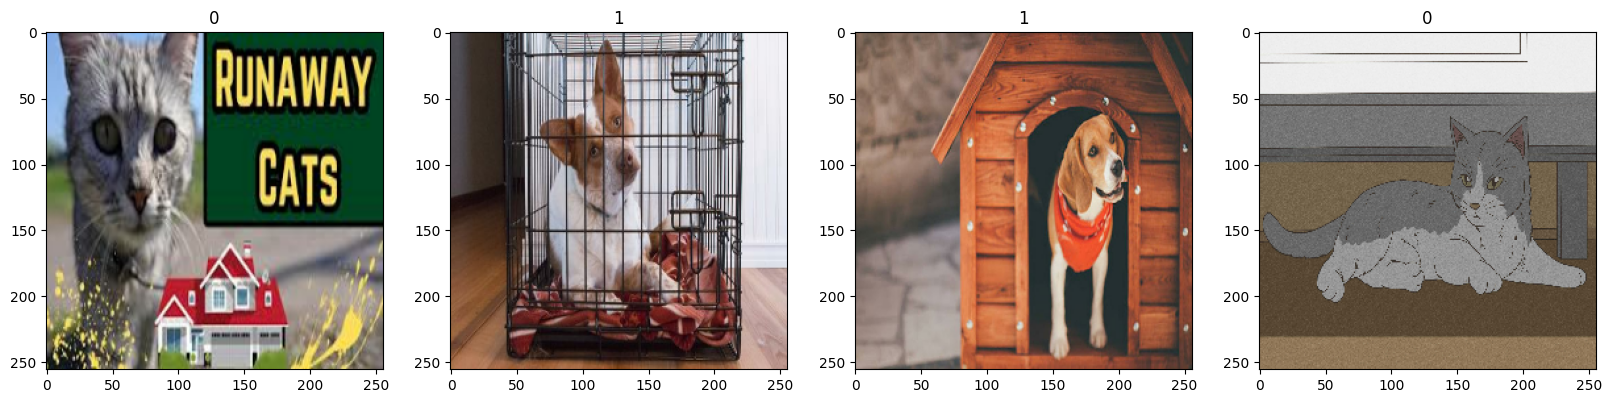

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [19]:
data = data.map(lambda x,y: (x/255, y))

In [27]:
data.as_numpy_iterator().next()

(array([[[[0.65227383, 0.7189405 , 0.74639153],
          [0.4978937 , 0.56456035, 0.59201133],
          [0.55131453, 0.6179812 , 0.6454322 ],
          ...,
          [0.79660213, 0.84225166, 0.84029084],
          [0.6938515 , 0.7499588 , 0.6864162 ],
          [0.56318074, 0.6302696 , 0.4944853 ]],
 
         [[0.62273186, 0.6931363 , 0.7087613 ],
          [0.41157705, 0.48192114, 0.49785155],
          [0.4267463 , 0.49329045, 0.5207414 ],
          ...,
          [0.77965206, 0.82138   , 0.85054666],
          [0.7692938 , 0.8162311 , 0.8088762 ],
          [0.7097015 , 0.764501  , 0.7114784 ]],
 
         [[0.59923697, 0.6594698 , 0.66700655],
          [0.3274577 , 0.38628122, 0.40319297],
          [0.5991594 , 0.65798295, 0.6836282 ],
          ...,
          [0.66210365, 0.7080595 , 0.6989909 ],
          [0.74131626, 0.7897844 , 0.77710056],
          [0.75778186, 0.80625   , 0.78210783]],
 
         ...,
 
         [[0.407644  , 0.54882044, 0.36597732],
          [0.20713

In [34]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [35]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [47]:
model = Sequential()

In [48]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [49]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
logdir='logs'

In [52]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [53]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 383ms/step - accuracy: 0.4235 - loss: 1.1348 - val_accuracy: 0.6458 - val_loss: 0.6840
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 405ms/step - accuracy: 0.6636 - loss: 0.6839 - val_accuracy: 0.6875 - val_loss: 0.6375
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 417ms/step - accuracy: 0.6554 - loss: 0.6283 - val_accuracy: 0.6667 - val_loss: 0.6615
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 409ms/step - accuracy: 0.6893 - loss: 0.5841 - val_accuracy: 0.7604 - val_loss: 0.5364
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 406ms/step - accuracy: 0.7509 - loss: 0.5355 - val_accuracy: 0.7396 - val_loss: 0.5493
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 406ms/step - accuracy: 0.7259 - loss: 0.5217 - val_accuracy: 0.7396 - val_loss: 0.5403
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 376ms/step - accuracy: 0.7903 - loss: 0.4629 - val_accuracy: 0.8021 - val_loss: 0.4135
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 418ms/step - accuracy: 0.8162 - loss: 0.4037 - val_accuracy: 0.

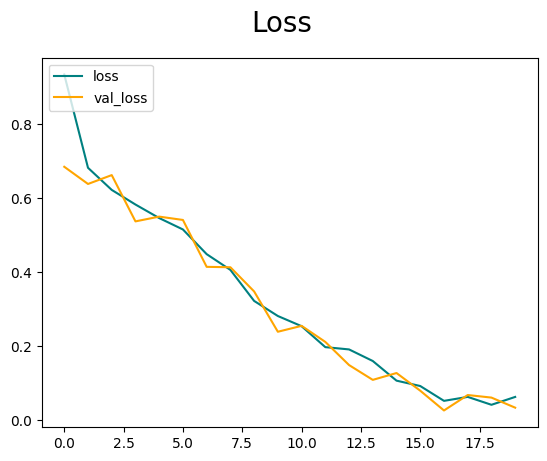

In [54]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

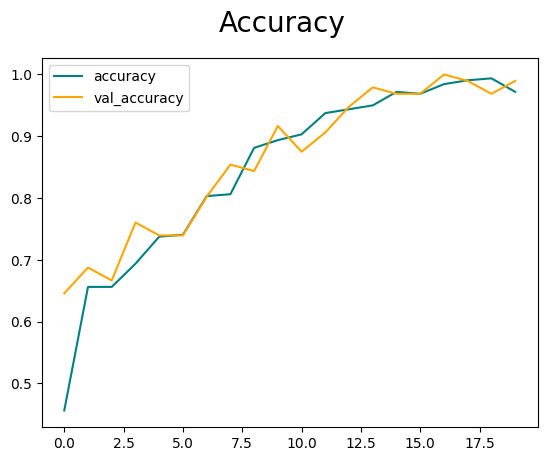

In [55]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [56]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [57]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [58]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


In [59]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.96153843, shape=(), dtype=float32) tf.Tensor(0.984127, shape=(), dtype=float32)


In [60]:
import cv2

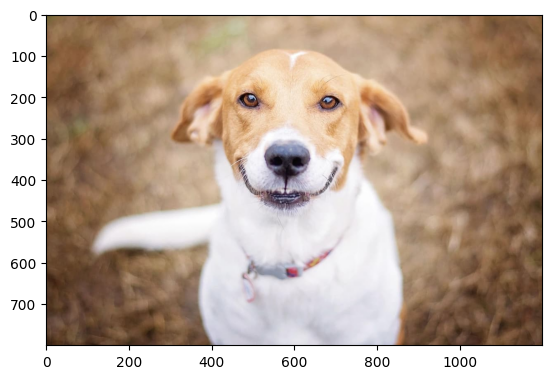

In [90]:
img = cv2.imread('dogtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

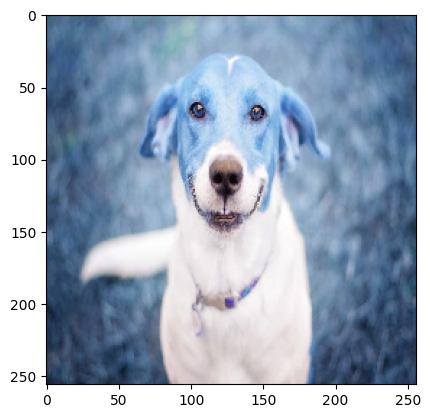

In [91]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [92]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [93]:
yhat

array([[0.6162805]], dtype=float32)

In [94]:
if yhat > 0.5: 
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cat')

Predicted class is Dog


In [111]:
from tensorflow.keras.models import load_model

In [112]:
model.save(os.path.join('models','catsdogsmodel.h5'))

In [113]:
new_model = load_model(os.path.join('models','catsdogsmodel.h5'))

In [114]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [115]:
if yhatnew > 0.5: 
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cat')

Predicted class is Dog
